<a href="https://colab.research.google.com/github/vipul30-create/Diabetes-prediction-model/blob/main/diabetes_prediction_model_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Prediction Model**

![24644952_Tiny doctors with glucometer flat vector illustration (1)...jpg](attachment:7e668641-f962-40de-869e-c58647c80592.jpg)

**Table of Content:**

1. [Introduction](#1)
1. [About the Dataset](#2)
1. [Libraries and Utilities](#3)
1. [Loading the Dataset](#4)
1. [Exploratory Data Analysis (EDA)](#5)
    1. [Analysis of Categorical Variables](#6)
    1. [Analysis of Numeric Variables](#7)
1. [Data Preprocessing](#8)
    1. [Analysis of Target Variable](#9)
    1. [Analysis of Outliers](#10)
    1. [Analysis of Missing Values](#11)
    1. [Prediction-Based Assignment Process for Missing Values](#12)
    1. [ Correlation Analysis](#13)
1. [Feature Engineering](#14)
1. [Data Preprocessing for Modeling](#15)
    1. [Encoding](#16)
    1. [Feature Scaling](#17)
1. [Model Building and Evaluation](#18)
    1. [LogisticRegression](#19)
    1. [KNN](#20)
1. [Conclusion](#21)
    





<a id="1"></a> <br>
# 1. Introduction



The aim of this project is to develop 2 machine learning model that can predict whether individuals are diabetic based on various health-related features. By analyzing a subset of the comprehensive dataset obtained from the National Institute of Diabetes and Digestive and Kidney Diseases, the project seeks to employ data analysis, feature engineering, and machine learning techniques to create an accurate predictive model. .

<a id="2"></a> <br>
# 2. About the Dataset

Begin by gaining a clear understanding of the dataset sourced from the National Institute of Diabetes and Digestive and Kidney Diseases in the USA.

* This dataset is a subset of a larger dataset, collected as part of a diabetes study conducted on Pima Indian women aged 21 and above residing in Phoenix, the largest city in the state of Arizona.

* The dataset consists of 768 observations and 9 variables.

* The target variable, "outcome," indicates whether an individual tested positive (1) or negative (0) for diabetes.

**Variables**

* Pregnancies: Number of pregnancies.
* Glucose: 2-hour plasma glucose concentration from an oral glucose tolerance test.
* Blood Pressure: Diastolic blood pressure (mm Hg).
* Skin Thickness: Skinfold thickness.
* Insulin: 2-hour serum insulin levels (mu U/ml).
* Diabetes Pedigree Function: A function that indicates diabetes prevalence based on family history.
* BMI (Body Mass Index): Weight-to-height ratio.
* Age: Age in years.
* Outcome: The target variable indicating diabetes outcome (1 = positive, 0 = negative).

This dataset aims to predict whether individuals have diabetes based on these features.

<a id="3"></a> <br>
# 3. Libraries and Utilities

In [ ]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# !pip install missingno
import missingno as msno
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score,RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.neighbors import LocalOutlierFactor,KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.width', None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<a id="4"></a> <br>
# 4. Loading the Dataset

In [ ]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


<a id="5"></a> <br>
# 5. Exploratory Data Analysis (EDA)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

Let's capture numeric and categorical variables.

In [ ]:
cat_cols=[col for col in df.columns if (df[col].dtypes=="O") | ( df[col].nunique() < 10)]

In [ ]:
cat_cols

['Outcome']

In [ ]:
num_cols=[col for col in df.columns if (df[col].dtypes in ["float", "int"]) and ( df[col].nunique()> 10)]

In [ ]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

<a id="6"></a> <br>
# Analysis of Categorical Variables

In [ ]:
def cat_summary(dataframe,cat_cols ,plot=False):

    for col in cat_cols:
        print (f" {col} : \n{dataframe[col].value_counts()}\n")

    if plot:

        sns.countplot(x=dataframe[col], data=dataframe)
        plt.show(block=True)

 Outcome : 
0    500
1    268
Name: Outcome, dtype: int64



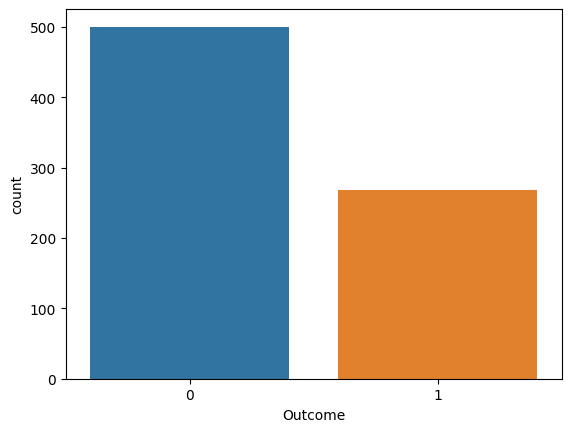

In [ ]:
for col in cat_cols:
    cat_summary(df, cat_cols, plot=True)

<a id="7"></a> <br>
# Analysis of Numeric Variables

In [ ]:
def num_summary(dataframe, num_col , plot=False):

    quantiles=[0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    print(dataframe[num_col].describe(quantiles).T)

    if plot:

        dataframe[num_col].hist(bins=20)
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show(block=True)

count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: Pregnancies, dtype: float64


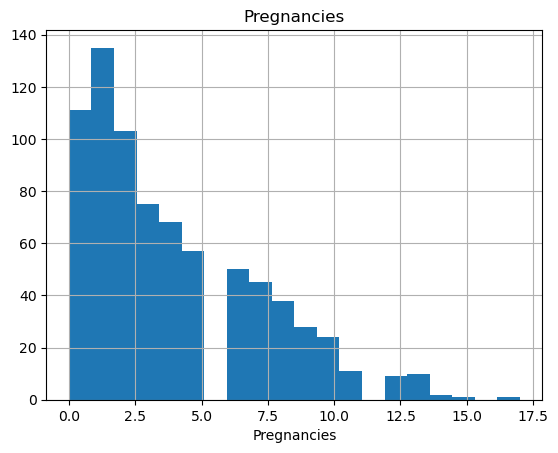

count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: Glucose, dtype: float64


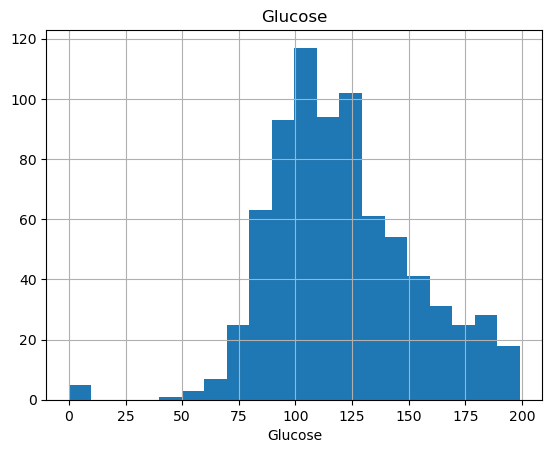

count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BloodPressure, dtype: float64


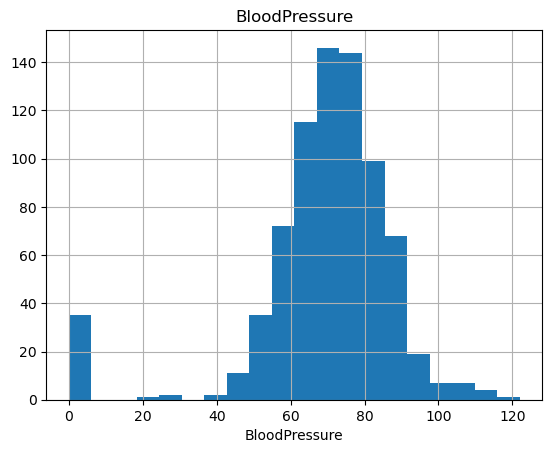

count   768.000
mean     20.536
std      15.952
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
max      99.000
Name: SkinThickness, dtype: float64


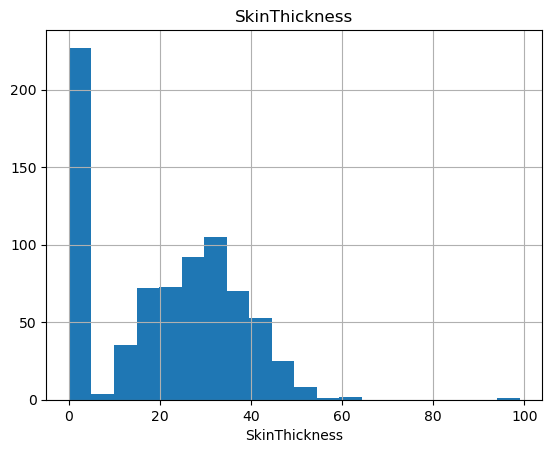

count   768.000
mean     79.799
std     115.244
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
max     846.000
Name: Insulin, dtype: float64


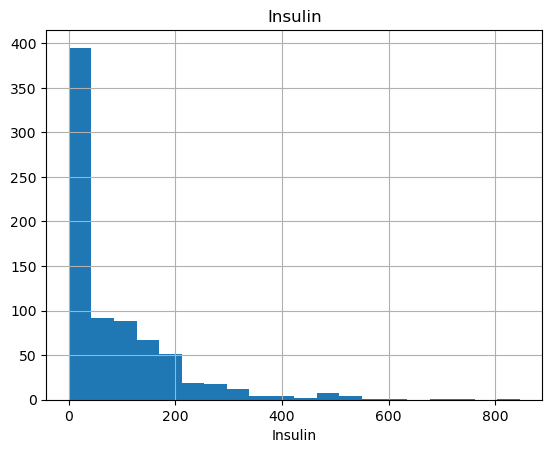

count   768.000
mean     31.993
std       7.884
min       0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
max      67.100
Name: BMI, dtype: float64


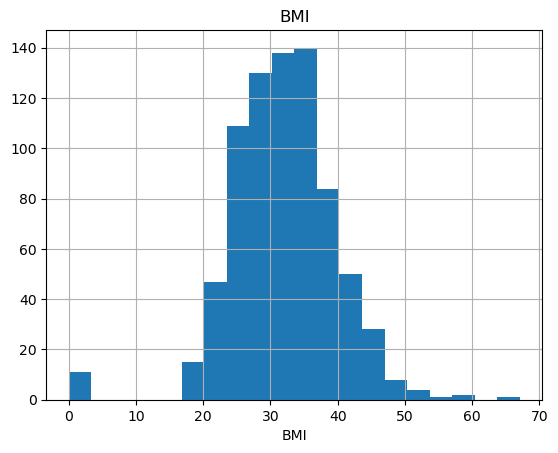

count   768.000
mean      0.472
std       0.331
min       0.078
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


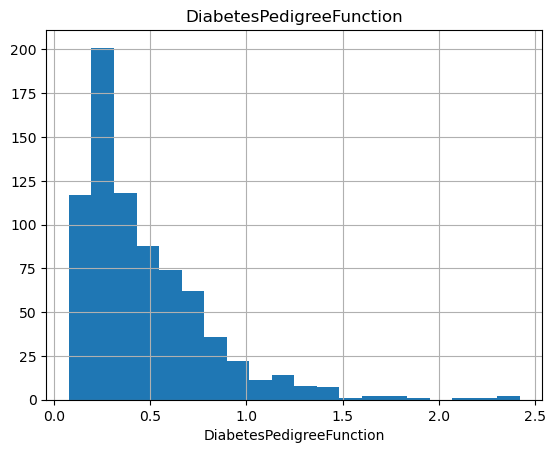

count   768.000
mean     33.241
std      11.760
min      21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
max      81.000
Name: Age, dtype: float64


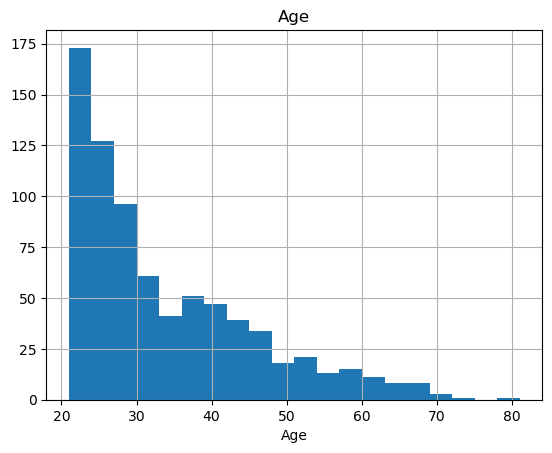

In [ ]:
for col in num_cols:
    num_summary(df, col, plot=True)

<a id="8"></a> <br>
# 6. Data Preprocessing

<a id="9"></a> <br>
# Analysis of Target Variable

In [ ]:
for col in num_cols:
    print (pd.DataFrame({col + "_mean" :df.groupby("Outcome")[col].mean()}), end="\n\n")
    print("---------------------------------------------")

         Pregnancies_mean
Outcome                  
0                   3.298
1                   4.866

---------------------------------------------
         Glucose_mean
Outcome              
0             109.980
1             141.257

---------------------------------------------
         BloodPressure_mean
Outcome                    
0                    68.184
1                    70.825

---------------------------------------------
         SkinThickness_mean
Outcome                    
0                    19.664
1                    22.164

---------------------------------------------
         Insulin_mean
Outcome              
0              68.792
1             100.336

---------------------------------------------
         BMI_mean
Outcome          
0          30.304
1          35.143

---------------------------------------------
         DiabetesPedigreeFunction_mean
Outcome                               
0                                0.430
1                        

In [ ]:
def outlier_thresholds(dataframe ,col ,q1=.05 , q3=.95, decimal=3) :

    quartile1=dataframe[col].quantile(q1)
    quartile3=dataframe[col].quantile(q3)
    iqr=quartile3-quartile1
    low_limit= round(quartile1 - (iqr*1.5) , decimal)
    up_limit= round(quartile3 + (iqr*1.5), decimal)
    return low_limit , up_limit

<a id="10"></a> <br>
# Analysis of Outliers

In [ ]:
for col in num_cols:
    print(col , ":" , outlier_thresholds(df, col), end="\n\n")

Pregnancies : (-15.0, 25.0)

Glucose : (-74.0, 334.0)

BloodPressure : (-38.25, 166.95)

SkinThickness : (-66.0, 110.0)

Insulin : (-439.5, 732.5)

BMI : (-12.092, 78.288)

DiabetesPedigreeFunction : (-1.348, 2.622)

Age : (-34.5, 113.5)



In [ ]:
def check_outliers(dataframe, col , q1=.05 ,q3=.95):
    low ,up= outlier_thresholds(dataframe,col, q1, q3 )
    if dataframe[(dataframe[col] < low) | (dataframe[col] > up)].any(axis=None):
        return True
    else:
        return False

In [ ]:
for col in num_cols:
    print(col ,":", check_outliers(df, col),end="\n\n")


Pregnancies : False

Glucose : False

BloodPressure : False

SkinThickness : False

Insulin : True

BMI : False

DiabetesPedigreeFunction : False

Age : False



In [ ]:
def grab_outliers(dataframe, col, index=False):
    low, up = outlier_thresholds(dataframe,col )

    if dataframe[((dataframe[col] < low) | (dataframe[col] > up))].shape[0] > 0 :
        print(dataframe[((dataframe[col] < low) | (dataframe[col] > up))])
    if index:
        indeces= dataframe[((dataframe[col] < low) | (dataframe[col] > up))].index
        return indeces

In [ ]:
for col in num_cols:
    print(grab_outliers(df , col , index=False))

None
None
None
None
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
13             1      189             60             23      846 30.100                     0.398   59        1
228            4      197             70             39      744 36.700                     2.329   31        0
None
None
None
None


In [ ]:
def boxplot_outliers(dataframe, col):
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=dataframe[col])
    plt.show(block=True)

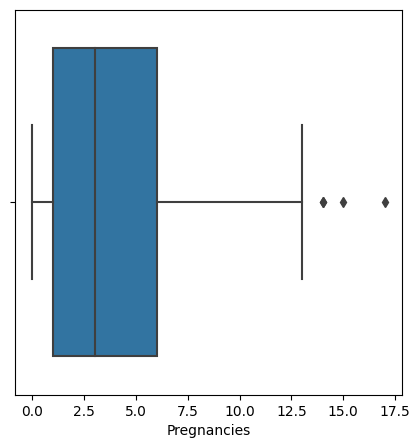

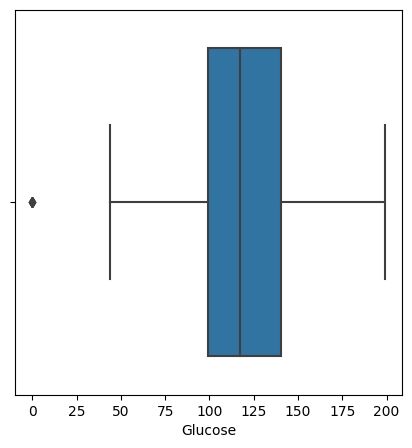

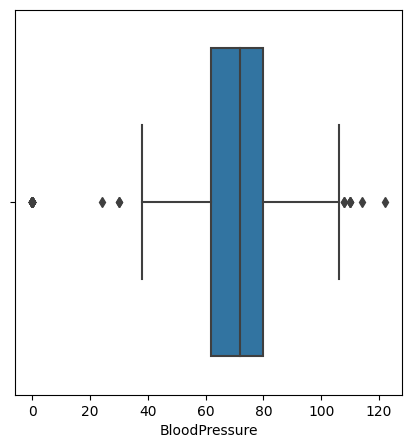

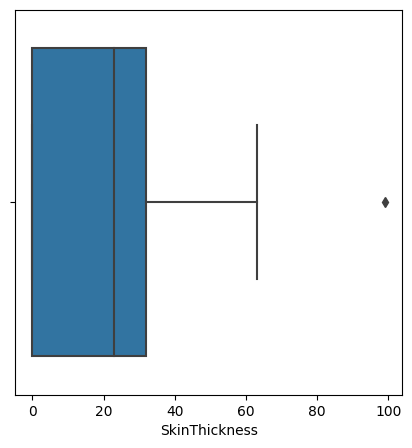

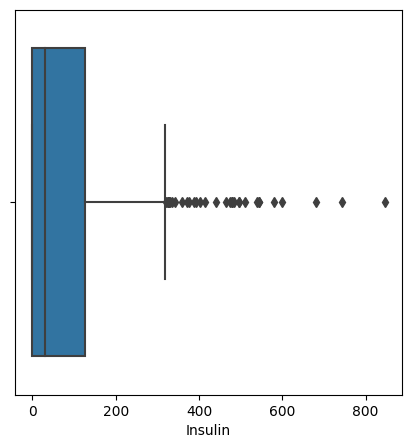

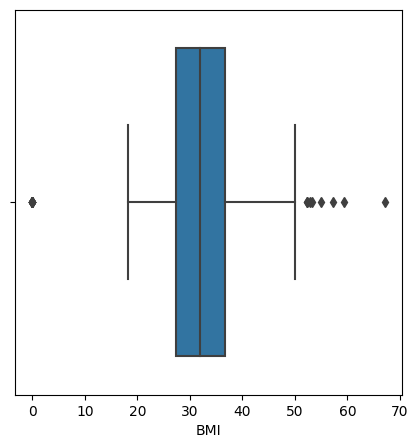

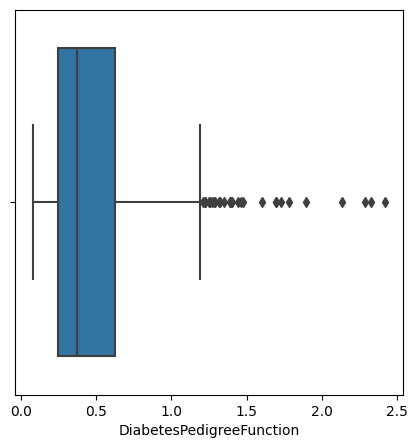

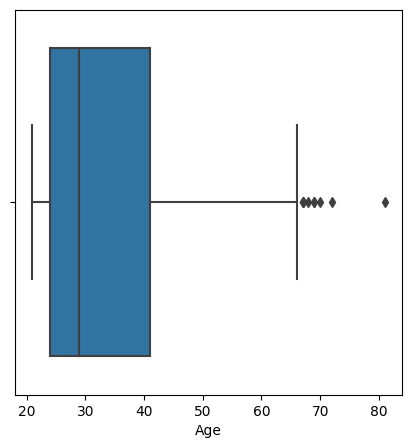

In [ ]:
for col in num_cols:
    boxplot_outliers(df, col)

In [ ]:
def replace_with_thresholds(dataframe, col_name, q1=.05, q3=.95):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
    dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [ ]:
for col in num_cols:
    replace_with_thresholds(df,col)

In [ ]:
for col in num_cols:
    print(col ,":", check_outliers(df, col),end="\n\n")


Pregnancies : False

Glucose : False

BloodPressure : False

SkinThickness : False

Insulin : False

BMI : False

DiabetesPedigreeFunction : False

Age : False



<a id="11"></a> <br>
# Analysis of Missing Values

In [ ]:
def isnull_sum(dataframe ,col):
    if dataframe[col].isnull().sum() > 0:
        print(f"{col} : { dataframe[col].isnull().sum()}" , end="\n\n")
    else:
        print(f"{col} : no missing value" , end="\n\n")

In [ ]:
for col in df.columns:
    isnull_sum(df, col)

Pregnancies : no missing value

Glucose : no missing value

BloodPressure : no missing value

SkinThickness : no missing value

Insulin : no missing value

BMI : no missing value

DiabetesPedigreeFunction : no missing value

Age : no missing value

Outcome : no missing value



While there are no missing observations in the dataset, certain variables like "Glucose," "Insulin," and others may have instances with a value of 0, which could signify missing data. For instance, it's impossible for someone's glucose or insulin level to be 0. To handle this, we will treat these 0 values as NaN and proceed to create new groupings to handle missing values in the best way.

Let's exclude "Pregnancies","DiabetesPedigreeFunction" and "Outcome" since they may have 0 value.

In [ ]:
target_cols=[col for col in df.columns if col not in ["Pregnancies",'DiabetesPedigreeFunction','Outcome']]

In [ ]:
target_cols

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

In [ ]:
for col in target_cols:
    df[col]=df[col].replace(0,np.nan)

In [ ]:
def missing_values(dataframe, na_name=False):

    na_cols= [col for col in dataframe.columns if [dataframe[col].isnull().sum() > 0]]
    miss_number= dataframe[na_cols].isnull().sum()
    ratio=(dataframe[na_cols].isnull().sum() / dataframe.shape[0] * 100)
    missing_df = pd.concat([miss_number, np.round(ratio, 2)], axis=1, keys=['miss_number', 'ratio'])
    print(missing_df, end='\n')

    if na_name:
        return na_cols

In [ ]:
missing_values(df)

                          miss_number  ratio
Pregnancies                         0  0.000
Glucose                             5  0.650
BloodPressure                      35  4.560
SkinThickness                     227 29.560
Insulin                           374 48.700
BMI                                11  1.430
DiabetesPedigreeFunction            0  0.000
Age                                 0  0.000
Outcome                             0  0.000


Let's examine the structure of missing data.

<Axes: >

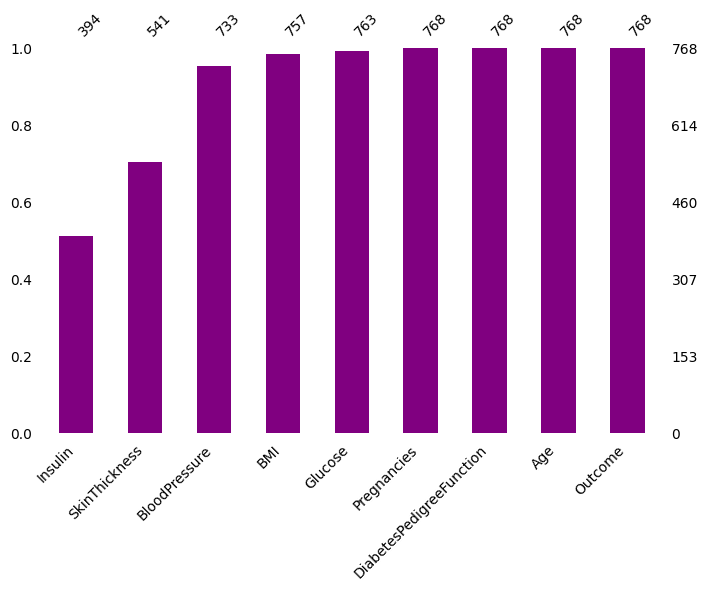

In [ ]:
msno.bar(df, color="purple", sort="ascending", figsize=(8,5),fontsize=10) #provides the number of complete values in the dataset

<Axes: >

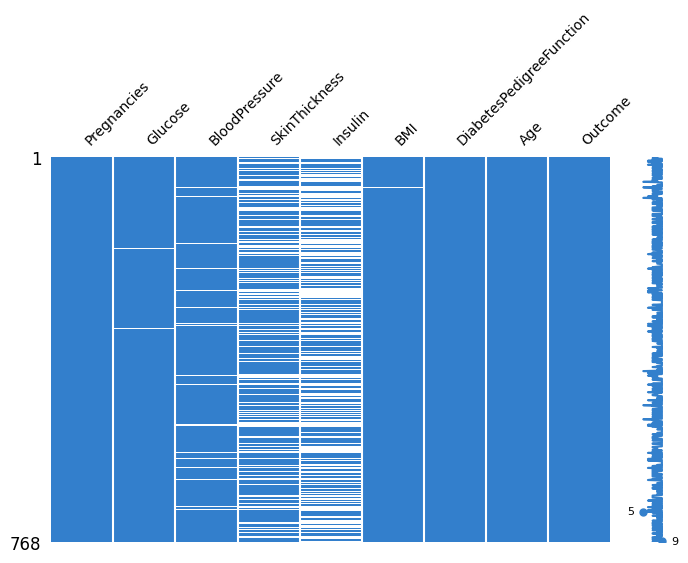

In [ ]:
msno.matrix(df,color=(0.2, 0.5, 0.8),figsize=(8,5), fontsize=10) #it helps identify missing values in the dataset and their patterns

<Axes: >

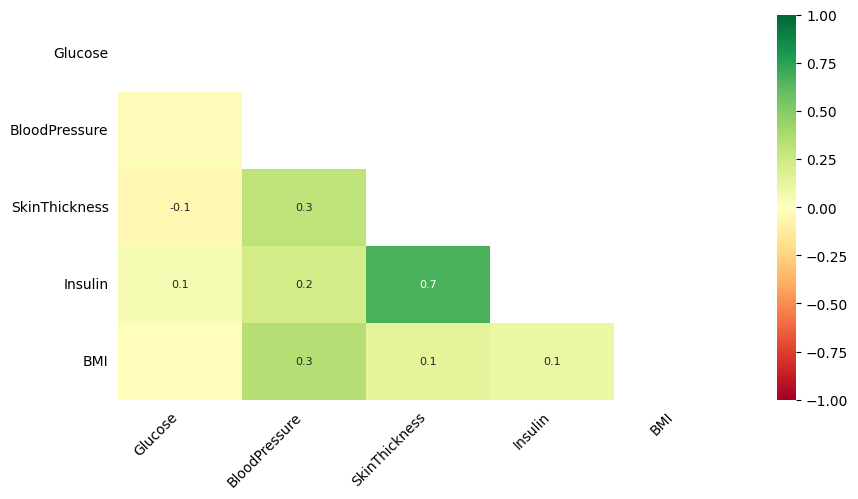

In [ ]:
msno.heatmap(df,cmap="RdYlGn", figsize=(10,5), fontsize=10)  #nullity correlation

Missing values of Insulin and SkinThickness may have appeared together.

<a id="12"></a> <br>
# Prediction-Based Assignment Process for Missing Values

In [ ]:
scaler=MinMaxScaler()

df=pd.DataFrame(scaler.fit_transform(df), columns=df.columns) #standardization of variables
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.353,0.671,0.490,0.304,NaN,0.315,0.234,0.483,1.000
1,0.059,0.265,0.429,0.239,NaN,0.172,0.117,0.167,0.000
2,0.471,0.897,0.408,NaN,NaN,0.104,0.254,0.183,1.000
3,0.059,0.290,0.429,0.174,0.111,0.202,0.038,0.000,0.000
4,0.000,0.600,0.163,0.304,0.214,0.509,0.944,0.200,1.000


In [ ]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)

df=pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.353,0.671,0.490,0.304,0.446,0.315,0.234,0.483,1.000
1,0.059,0.265,0.429,0.239,0.059,0.172,0.117,0.167,0.000
2,0.471,0.897,0.408,0.274,0.312,0.104,0.254,0.183,1.000
3,0.059,0.290,0.429,0.174,0.111,0.202,0.038,0.000,0.000
4,0.000,0.600,0.163,0.304,0.214,0.509,0.944,0.200,1.000


In [ ]:
df=pd.DataFrame(scaler.inverse_transform(df), columns=df.columns)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000,148.000,72.000,35.000,334.200,33.600,0.627,50.000,1.000
1,1.000,85.000,66.000,29.000,56.200,26.600,0.351,31.000,0.000
2,8.000,183.000,64.000,32.200,238.000,23.300,0.672,32.000,1.000
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0.000
4,0.000,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1.000


In [ ]:
missing_values(df)

                          miss_number  ratio
Pregnancies                         0  0.000
Glucose                             0  0.000
BloodPressure                       0  0.000
SkinThickness                       0  0.000
Insulin                             0  0.000
BMI                                 0  0.000
DiabetesPedigreeFunction            0  0.000
Age                                 0  0.000
Outcome                             0  0.000


<a id="13"></a> <br>
# Correlation Analysis

In [ ]:
def corr(dataframe, annot=True):
    sns.heatmap(dataframe.corr(), annot=annot, linewidths=.2, cmap='Reds', square=True)
    plt.show(block=True)

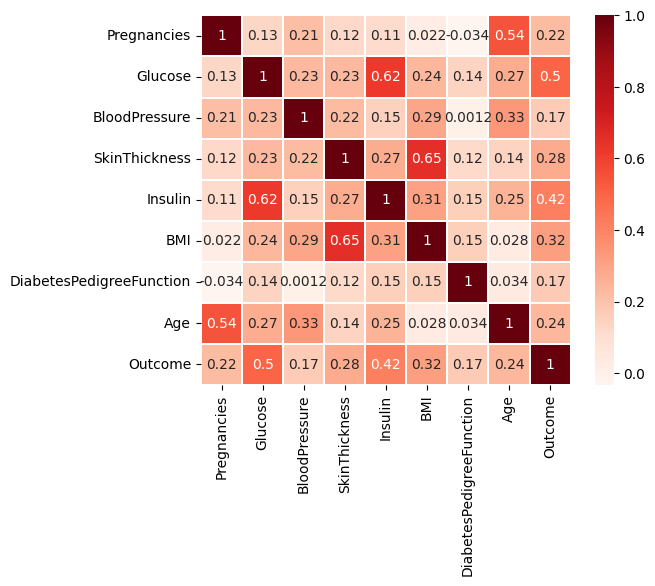

In [ ]:
corr(df)

We can observe a high correlation between BMI and SkinThickness, as well as between Glucose and Insulin. Correlation between Age and Pregnancies can be also considered as meaningful.

<a id="14"></a> <br>
# 7.Feature Engineering

 To extract meaningful information from existing features to create new one so that we can increase our model's performance

In [ ]:
df.loc[(df["Age"] < 18 ), "NEW_AGE"] = "young"
df.loc[(df["Age"] > 18 ) & (df["Age"] <= 24), "NEW_AGE"] = "adult"
df.loc[(df["Age"] > 24 ) & (df["Age"] <= 59), "NEW_AGE"] = "mid_adult"
df.loc[(df["Age"] >= 60), "NEW_AGE"] = "senior"


In [ ]:
df.loc[(df["BMI"] < 18.5) , "BMI_CAT"] ="underweight"
df.loc[(df["BMI"] >= 18.5) & (df["BMI"] < 24.9) , "BMI_CAT"] ="normal"
df.loc[(df["BMI"] >= 24.9) & (df["BMI"] < 29.9) , "BMI_CAT"]="overweight"
df.loc[(df["BMI"] > 30) , "BMI_CAT"] ="obese"

In [ ]:
df.loc[(df["Insulin"] < 15) , "INSULIN_CAT"] ="low"
df.loc[(df["Insulin"] >= 15) & (df["Insulin"] < 166) , "INSULIN_CAT"] ="normal"
df.loc[(df["Insulin"] >= 166) , "INSULIN_CAT"] ="high"

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE,BMI_CAT
0,6.000,148.000,72.000,35.000,334.200,33.600,0.627,50.000,1.000,mid_adult,obese
1,1.000,85.000,66.000,29.000,56.200,26.600,0.351,31.000,0.000,mid_adult,overweight
2,8.000,183.000,64.000,32.200,238.000,23.300,0.672,32.000,1.000,mid_adult,normal
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0.000,adult,overweight
4,0.000,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1.000,mid_adult,obese


<a id="15"></a> <br>
# 8.Data Preprocessing for Modeling

<a id="16"></a> <br>
# Encoding

In [ ]:
#Label Encoding

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols=[col for col in df.columns if (df[col].nunique() == 2) & (df[col].dtype not in ["int64" ,"float64"])]

In [ ]:
binary_cols #we wont't use label encoding since there isn't any binary col

[]

In [ ]:
#One-Hot Encoding
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]


In [ ]:
ohe_cols

['NEW_AGE', 'BMI_CAT']

In [ ]:
df= pd.get_dummies(df,columns= ohe_cols, drop_first=True)

KeyError: ignored

<a id="17"></a> <br>
# Feature Scaling

In [ ]:
rs=RobustScaler()
df[num_cols] =rs.fit_transform(df[num_cols])

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_mid_adult,NEW_AGE_senior,BMI_CAT_obese,BMI_CAT_overweight,BMI_CAT_underweight
0,0.600,0.738,0.000,0.498,2.050,0.158,0.665,1.235,1.000,1,0,1,0,0
1,-0.400,-0.762,-0.375,0.000,-0.741,-0.603,-0.056,0.118,0.000,1,0,0,1,0
2,1.000,1.571,-0.500,0.266,1.084,-0.962,0.783,0.176,1.000,1,0,0,0,0
3,-0.400,-0.667,-0.375,-0.498,-0.361,-0.440,-0.537,-0.471,0.000,0,0,0,1,0
4,-0.600,0.476,-2.000,0.498,0.382,1.190,5.008,0.235,1.000,1,0,1,0,0


<a id="18"></a> <br>
# 9.Model Building and Evaluation

<a id="19"></a> <br>
# LogisticRegression

In [ ]:
y=df["Outcome"]
X=df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

log_model=LogisticRegression().fit(X_train, y_train)
y_pred= log_model.predict(X_test)
y_prob= log_model.predict_proba(X_test)[:,1]


In [ ]:
#Evaluation of LogisticRegression

print(classification_report(y_test, y_pred))

#accuracy : 0.71
#f1-score : 0.54
#recall   : 0.57
#precision: 0.51


              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81        99
         1.0       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



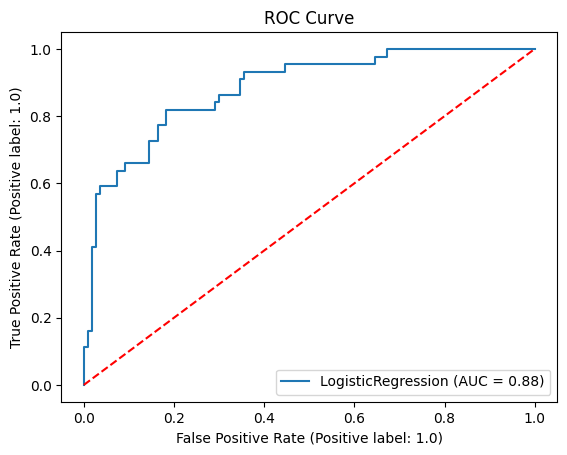

0.8816115702479339

In [ ]:
#ROC AUC

RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

roc_auc_score(y_test, y_prob) #0.80



In [ ]:
#5-Fold Cross-Validation

#We will use all dataset for 5-fold cross-validation since the dataset is not large enough

cv_results=cross_validate(log_model,
                          X,
                          y,
                         cv=5,
                         scoring=["accuracy","precision", "recall", "f1", "roc_auc"])

print(cv_results["test_accuracy"].mean())
print(cv_results["test_precision"].mean())
print(cv_results["test_recall"].mean())
print(cv_results["test_f1"].mean())

#Accuracy  : 0.78
#Precision : 0.72
#Recall    : 0.62
#f1        : 0.66

0.7799677446736271
0.7222790684492812
0.604472396925227
0.6569005862844224


<a id="20"></a> <br>
# KNN

In [ ]:
knn_model=KNeighborsClassifier().fit(X_train,y_train)
y_pred= knn_model.predict(X_test)
y_prob= knn_model.predict_proba(X_test)[:,1]

In [ ]:
#Evaluation of KNN

print(classification_report(y_test,y_pred))

#Accuracy  : 0.77
#Precision : 0.60
#Recall    : 0.63
#f1        : 0.62


              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       110
         1.0       0.57      0.57      0.57        44

    accuracy                           0.75       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
#ROC AUC
roc_auc_score(y_test,y_prob) #0.79

0.809607438016529

In [ ]:
#5-Fold Cross-Validation

cv_results=cross_validate(knn_model,
                          X,
                          y,
                         cv=5,
                         scoring=["accuracy","precision", "recall", "f1", "roc_auc"])

print(cv_results["test_accuracy"].mean())
print(cv_results["test_precision"].mean())
print(cv_results["test_recall"].mean())
print(cv_results["test_f1"].mean())
print(cv_results["test_roc_auc"].mean())

#Accuracy  : 0.77
#Precision : 0.70
#Recall    : 0.63
#f1        : 0.66
#roc auc   : 0.83

0.774823868941516
0.7033141451626743
0.6309573724668064
0.6621087706017421
0.8357410901467505


In [ ]:
#Hyperparameter Optimization

cv_results=cross_validate(knn_model,
                          X,
                          y,
                         cv=5,
                         scoring=["accuracy","precision", "recall", "f1", "roc_auc"])

print(cv_results["test_accuracy"].mean())
print(cv_results["test_precision"].mean())
print(cv_results["test_recall"].mean())
print(cv_results["test_f1"].mean())
print(cv_results["test_roc_auc"].mean())

#optimal n : 24

0.7839572192513369
0.7070948839305837
0.6572327044025157
0.6797397047397047
0.8418242487770791


In [ ]:
#Final KNN Model
knn_final=knn_model.set_params(**knn_gs_best.best_params_).fit(X_train,y_train)
y_pred= knn_final.predict(X_test)
y_prob= knn_final.predict_proba(X_test)[:,1]

NameError: ignored

In [ ]:
#Evaluation of Final KNN Model

#5-Fold Cross-Validation

cv_results=cross_validate(knn_final,
                          X,
                          y,
                         cv=5,
                         scoring=["accuracy","precision", "recall", "f1", "roc_auc"])

print(cv_results["test_accuracy"].mean())
print(cv_results["test_precision"].mean())
print(cv_results["test_recall"].mean())
print(cv_results["test_f1"].mean())
print(cv_results["test_roc_auc"].mean())

#Accuracy  : 0.79
#Precision : 0.76
#Recall    : 0.60
#f1        : 0.62
#roc auc   : 0.86

NameError: ignored

<a id="21"></a> <br>
# 10.Conclusion

In this project, we utilized the Pima Indians Diabetes Database to conduct Exploratory Data Analysis, analyze missing and outlier data, perform feature engineering and feature extraction for data preparation in modeling. Subsequently, we used the K-Nearest Neighbors (KNN) and Logistic Regression models to predict diabetes occurrence among individuals. Due to the dataset's small size and lack of significant balance, we chose to assess model performance using recall and F1 scores instead of accuracy scores. This evaluation strategy highlighted the superiority of the Logistic Regression model over the KNN model even though we observe that KNN's accuracy is slightly higher than Logistic Regression Model. While more sophisticated machine learning models could have been used, we specifically selected these two models for this project and prefer Logistic Regression over KNN.